# Introduction

Followinf Analysis is abput Chicago Crime dataset from Kaggle. EDA of the Dataset provide stats and charts on the Crime & action Taken against the Crime. Objective is to see Stats of the Frequent Crime, Arrest Ration and Trend of the Crime.

# 1. Importing Library 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

#  2.  Reading Dataset

In [5]:
#2.
Part1 = pd.read_csv("./Chicago_Crimes_2008_to_2011.csv",error_bad_lines=False)
Part2 = pd.read_csv("./Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)
Crime_Data = pd.concat([Part1,Part2],ignore_index=False, axis=0)
del Part1
del Part2
Crime_Data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
Crime_Data.shape

b'Skipping line 1149094: expected 23 fields, saw 41\n'


(2997929, 23)

In [6]:
# Sample data.
Crime_Data.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"


Above Dataset has more information about the crime, since my objective scope is less. I am concentrating on only few features of the Dataset.

#  3. Cleaning the data

From the above data removing all the feature which has very less significants

In [7]:
Crime_Data.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)


Crime happen in various locations like Street, Apartment, etc... and Description of most of the crime are same. So have picked top 20 Description and Location Description. marking the least frequent as Others.

In [8]:
least_Loc = list(Crime_Data['Location Description'].value_counts()[20:].index)
least_Description = list(Crime_Data['Description'].value_counts()[20:].index)

In [9]:
for x in least_Loc:
    Crime_Data.loc[Crime_Data['Location Description'] == x,Crime_Data.columns=='Location Description'] = "Others" 
for y in least_Description:
    Crime_Data.loc[Crime_Data['Description'] == y,Crime_Data.columns=='Description'] = "Others" 
    

In [10]:
Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format='%m/%d/%Y %I:%M:%S %p')

In [11]:
Crime_Data['Primary Type']         = pd.Categorical(Crime_Data['Primary Type'])
Crime_Data['Location Description'] = pd.Categorical(Crime_Data['Location Description'])
Crime_Data['Description']          = pd.Categorical(Crime_Data['Description'])

In [12]:
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

In [13]:
Crime_Data.shape

(2997929, 10)

In [14]:
Crime_Data.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,,,
2008-10-07 12:39:00,4785,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,Others,ALLEY,True,False,41.758276,-87.622451
2008-10-09 03:30:00,4786,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,Others,STREET,True,False,41.870252,-87.746069
2008-10-09 08:35:00,4787,2008-10-09 08:35:00,030XX W MANN DR,HOMICIDE,Others,PARK PROPERTY,False,False,41.770990,-87.698901


After cleaning the data and removing the unsed cloumns we have data as below. 
 we can use the Data(Day, Time), Location, Arrest and Primary Type of the Crime to visulize & infer information from that.

#  4. Visualize of dataset

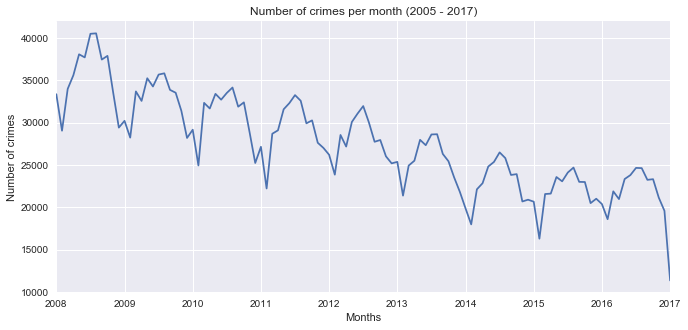

In [36]:
plt.figure(figsize=(11,5))
Crime_Data.resample('m').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

From the above chart it is clear there is a constant decrease other the year
all the year crime pattern through out the year it is very similar. Also, every Year the crime rate in summer is pretty high than winter.

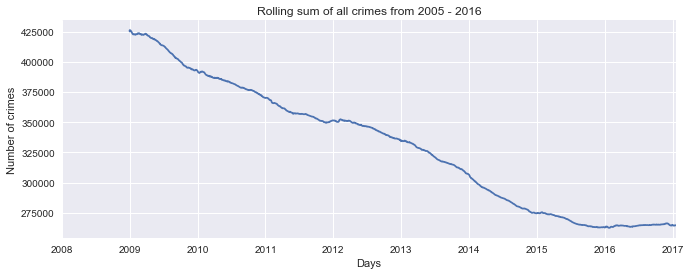

In [17]:
plt.figure(figsize=(11,4))
Crime_Data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

The Rolling sum show there is a constant decrease in the crime rate in Chicago.

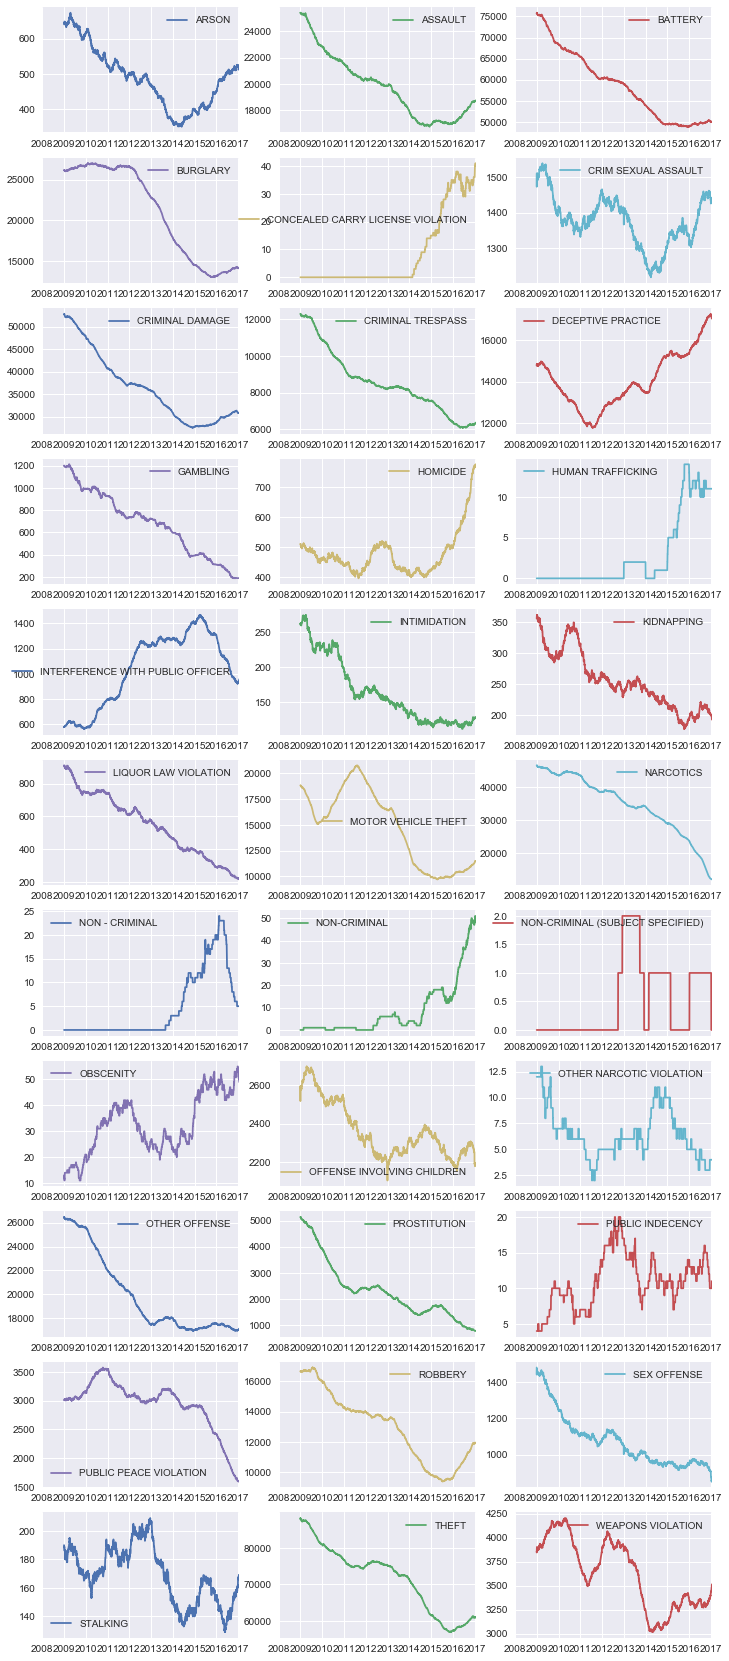

In [18]:
crimes_count_date = Crime_Data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=Crime_Data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Above shows the trend for the high frequent crimes in the city.

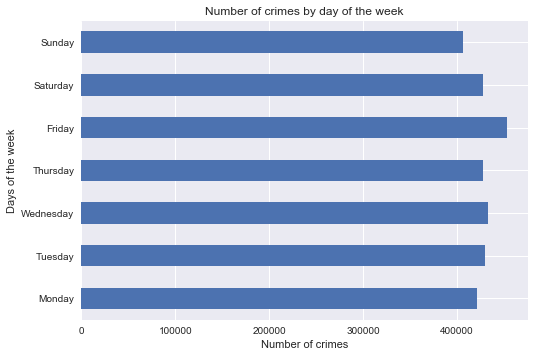

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
Crime_Data.groupby([Crime_Data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()


Above chart show almost everyday of the week has the same crime incidents and Friday has the most crime scene.

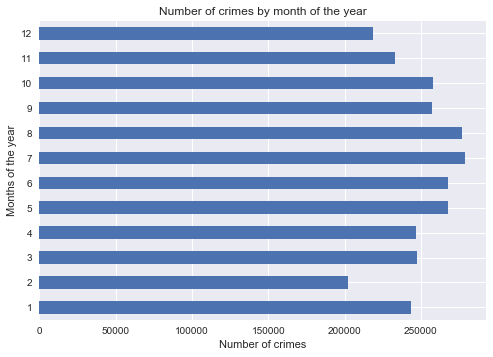

In [24]:
Crime_Data.groupby([Crime_Data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

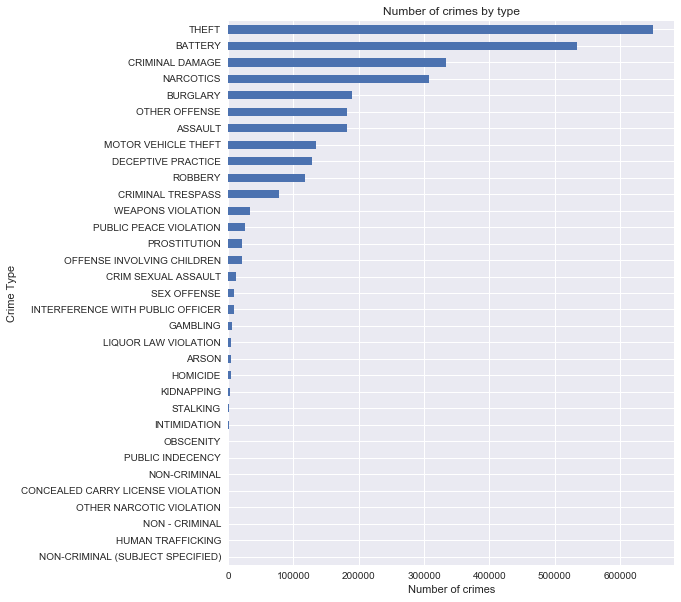

In [25]:
plt.figure(figsize=(8,10))
Crime_Data.groupby([Crime_Data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

Theft is main type of crime in Chicago.

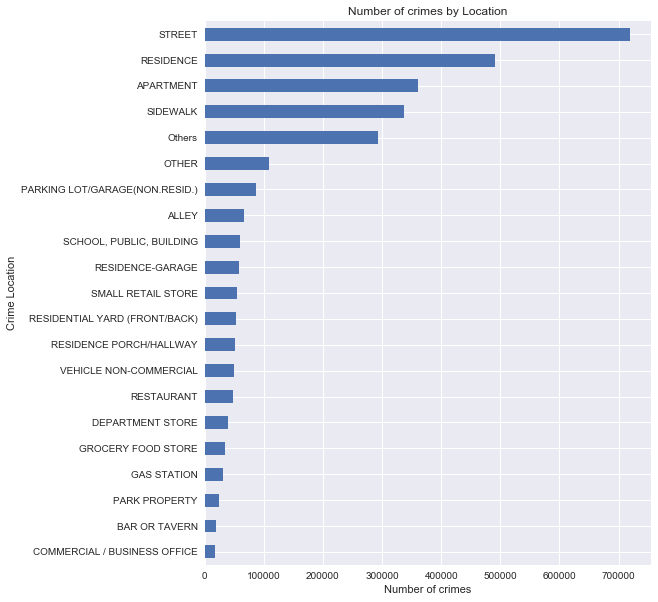

In [26]:
plt.figure(figsize=(8,10))
Crime_Data.groupby([Crime_Data['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

Residential Area with Street, Residence, Apartment is the hotspot for the crime.

#  5. Stat of the dataset

In [27]:
Crime_Data['Primary Type'].value_counts()/Crime_Data.shape[0]

THEFT                                0.217068
BATTERY                              0.178104
CRIMINAL DAMAGE                      0.111412
NARCOTICS                            0.102500
BURGLARY                             0.063185
OTHER OFFENSE                        0.060778
ASSAULT                              0.060556
MOTOR VEHICLE THEFT                  0.044670
DECEPTIVE PRACTICE                   0.043037
ROBBERY                              0.039444
CRIMINAL TRESPASS                    0.026062
WEAPONS VIOLATION                    0.010958
PUBLIC PEACE VIOLATION               0.008644
PROSTITUTION                         0.007213
OFFENSE INVOLVING CHILDREN           0.007131
CRIM SEXUAL ASSAULT                  0.004186
SEX OFFENSE                          0.003265
INTERFERENCE WITH PUBLIC OFFICER     0.003066
GAMBLING                             0.002023
LIQUOR LAW VIOLATION                 0.001656
ARSON                                0.001502
HOMICIDE                          

In [33]:
Crime_Data['Arrest'].value_counts()

False    2203212
True      794717
Name: Arrest, dtype: int64

In [34]:
Crime_Data['Arrest'].value_counts()/Crime_Data.shape[0]

False    0.734911
True     0.265089
Name: Arrest, dtype: float64

Only 25% of the Crime is convicted and Arrested

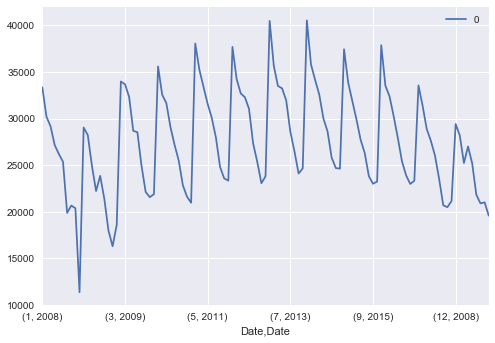

In [44]:
Crime_By_Month = pd.DataFrame(Crime_Data.groupby([Crime_Data.index.month, Crime_Data.index.year ]).size())
Crime_By_Month.plot()
plt.show()

In [48]:
#Above plot similar to the we saw before to have clear picture lets add new columns
 
Crime_Data['month'] = Crime_Data.index.month
Crime_Data['year'] = Crime_Data.index.year
Crime_Data.head(3)


,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,month,year
Date,,,,,,,,,,,,
2008-10-07 12:39:00,4785,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,Others,ALLEY,True,False,41.758276,-87.622451,10,2008
2008-10-09 03:30:00,4786,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,Others,STREET,True,False,41.870252,-87.746069,10,2008
2008-10-09 08:35:00,4787,2008-10-09 08:35:00,030XX W MANN DR,HOMICIDE,Others,PARK PROPERTY,False,False,41.770990,-87.698901,10,2008


In [52]:
monthDict = {'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}
Crime_Data['Month'] = Crime_Data['month'].apply(lambda x: monthDict[str(x)])
Crime_Data.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude,month,year,Month
Date,,,,,,,,,,,,,
2008-10-07 12:39:00,4785,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,Others,ALLEY,True,False,41.758276,-87.622451,10,2008,Oct
2008-10-09 03:30:00,4786,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,Others,STREET,True,False,41.870252,-87.746069,10,2008,Oct
2008-10-09 08:35:00,4787,2008-10-09 08:35:00,030XX W MANN DR,HOMICIDE,Others,PARK PROPERTY,False,False,41.770990,-87.698901,10,2008,Oct


In [53]:
crime_activity_plot = pd.DataFrame(Crime_Data.groupby(['Month','year']).size().sort_values(ascending=False).rename('Count').reset_index())
crime_activity_plot.head()

,Month,year,Count
0,Aug,2008,40531
1,Jul,2008,40480
2,May,2008,38058
3,Oct,2008,37874
4,Jun,2008,37691


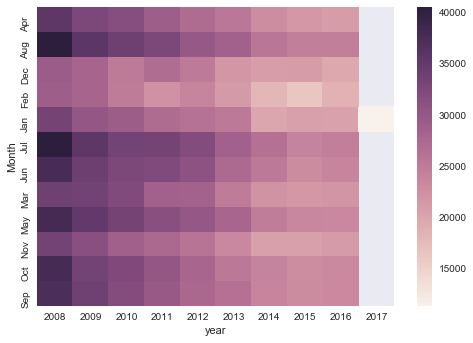

In [57]:
crime_activity_plot_gen = crime_activity_plot.pivot_table(values='Count',index='Month',columns='year')
sns.heatmap(crime_activity_plot_gen)

from the above we can clearly see there is an Decrease in the crime throughout the years

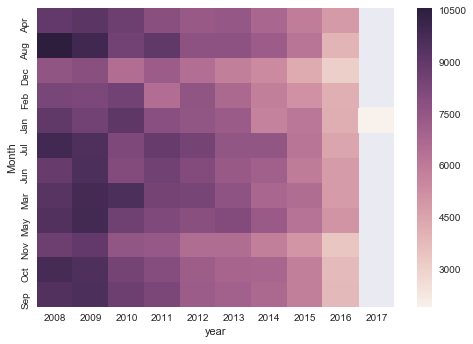

In [64]:
Arrest_By_Month = Crime_Data[Crime_Data['Arrest'] ==True ]
arrest_yearly_plot = pd.DataFrame(Arrest_By_Month.groupby(['Month','year']).size().sort_values(ascending=False).rename('Count').reset_index())
arrest_yearly_matrix = arrest_yearly_plot.pivot_table(values='Count',index='Month',columns='year')
sns.heatmap(arrest_yearly_matrix)

In [66]:
Crime_Year = pd.DataFrame(Crime_Data.groupby('year').size().rename('Count').reset_index())
Arrest_Year = pd.DataFrame(Arrest_By_Month.groupby('year').size().rename('Count').reset_index())

In [70]:
Arrest_Year

,year,Count
0,2008,109935
1,2009,110735
2,2010,100414
3,2011,96161
4,2012,90511
5,2013,86219
6,2014,79057
7,2015,69397
8,2016,50386
9,2017,1902


In [71]:
Crime_Year

,year,Count
0,2008,426964
1,2009,392556
2,2010,370140
3,2011,351555
4,2012,335670
5,2013,306703
6,2014,274527
7,2015,262995
8,2016,265462
9,2017,11357


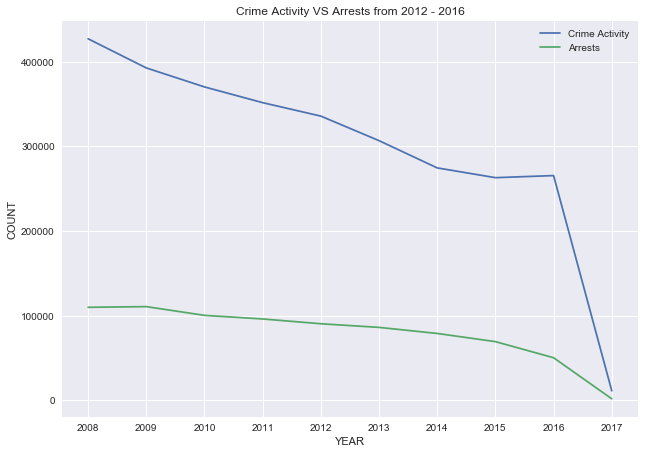

In [72]:
import matplotlib.ticker as ticker
x=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
y=Crime_Year['Count']
z=Arrest_Year['Count']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.plot(x,y,label='Crime Activity')
ax.plot(x,z,label='Arrests')
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")
ax.set_title("Crime Activity VS Arrests from 2012 - 2016")
ax.legend()

We can see the similar pattern in arrest count and crime count over the years. As the crime decrease arrest also got decreased. In 2017 almost 90% of the crime incident reported are taken care of the Police.This show there is an increase in the Arrest rate over the years. In over all Incicdents only 25% are Arrested, in 2017 alone 905 is arrested. This shows there is an drastic improvement over the Years. 

# 6. Inference and Observation

1) The Crime rate is very high in Summer. So Climate is corelated to Crime count. Higher the temperature hoger the Crime.
2) Friday has most of the Crime scene.
3) Theft and Battery are the most Frequent Crime time.
4) Most of the Crime Scene happens in Residence, Appartment and Street. 
5) From the above two we can infer most affected are pedestrians and local Residents.
6) Above three points support the fact crime are more in summer as there are more frequent people activity in Summer.
7) Almost 3/4 of criminal are not arrested.
8) The crime rate decrease over the years from 2008 to 2017
9) The arrest count  also decreased over the years.
10) The arrest rate has been drastically increased over the years. 

# Conclusion and Future Scope

 In this analysis i have covered a very small scope of Crime rate and Arrest rate. we can futher proceed with location with most crime. Battery and theft so we can which car parking area is prone to crime. Dataset of Chicao climate can give more scope of analysis like Temperature, Season, Wind, Rain. Transport Dataset can give us information of new means of Transport and how Crime has reduced.
 
 Population dataset and Police case Dataset, these two can give proof & stats that are reason for the decrease in the crime. Plotting with City Map can give more insight about the crime pattern. From the analysis we can conclude that the crime rate has reduced over the year. Also, the arrest rate has been increase over the years.